<a href="https://colab.research.google.com/github/AbdulMominAlam/DSA/blob/main/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OECD columns: ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'Country', 'FREQ', 'Frequency of observation', 'MEASURE', 'Measure', 'UNIT_MEASURE', 'Unit of measure', 'PRICE_BASE', 'Price base', 'TRANSFORMATION', 'Transformation', 'TIME_PERIOD', 'Time period', 'R&D_Spend_MillionUSD', 'Observation value', 'OBS_STATUS', 'Observation status', 'OBS_STATUS_2', 'Observation status 2', 'OBS_STATUS_3', 'Observation status 3', 'AUX_OBS_STATUS', 'Aux observation status', 'CONF_STATUS', 'Confidentiality status', 'UNIT_MULT', 'Unit multiplier', 'BASE_PER', 'Base year', 'DECIMALS', 'Decimals']
Macro columns: ['Country', 'Year']
Company columns: ['CountryCode', 'MEASURE', 'Year', 'Company_R&D_Spend_MillionUSD']
Merged columns: ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'Country', 'FREQ', 'Frequency of observation', 'MEASURE', 'Measure', 'UNIT_MEASURE', 'Unit of measure', 'PRICE_BASE', 'Price base', 'TRANSFORMATION', 'Transformation', 'TIME_PERIOD', 'Ti

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Country,FREQ,Frequency of observation,MEASURE,Measure,...,Aux observation status,CONF_STATUS,Confidentiality status,UNIT_MULT,Unit multiplier,BASE_PER,Base year,DECIMALS,Decimals,Year
0,DATAFLOW,OECD.STI.STP:DSD_MSTI@DF_MSTI(1.3),Main Science and Technology Indicators (MSTI d...,I,JPN,Japan,A,Annual,G,Gross Domestic Expenditure on R&D (GERD),...,NaN,NaN,NaN,6,Millions,2020.0,NaN,0,Zero,2010
1,DATAFLOW,OECD.STI.STP:DSD_MSTI@DF_MSTI(1.3),Main Science and Technology Indicators (MSTI d...,I,JPN,Japan,A,Annual,G,Gross Domestic Expenditure on R&D (GERD),...,NaN,NaN,NaN,6,Millions,2020.0,NaN,0,Zero,2011
2,DATAFLOW,OECD.STI.STP:DSD_MSTI@DF_MSTI(1.3),Main Science and Technology Indicators (MSTI d...,I,JPN,Japan,A,Annual,G,Gross Domestic Expenditure on R&D (GERD),...,NaN,NaN,NaN,6,Millions,2020.0,NaN,0,Zero,2012
3,DATAFLOW,OECD.STI.STP:DSD_MSTI@DF_MSTI(1.3),Main Science and Technology Indicators (MSTI d...,I,JPN,Japan,A,Annual,G,Gross Domestic Expenditure on R&D (GERD),...,NaN,NaN,NaN,6,Millions,2020.0,NaN,0,Zero,2013
4,DATAFLOW,OECD.STI.STP:DSD_MSTI@DF_MSTI(1.3),Main Science and Technology Indicators (MSTI d...,I,JPN,Japan,A,Annual,G,Gross Domestic Expenditure on R&D (GERD),...,NaN,NaN,NaN,6,Millions,2020.0,NaN,0,Zero,2014


Renamed macro columns: {'STRUCTURE': 'GDP_Growth', 'STRUCTURE_ID': 'Inflation', 'STRUCTURE_NAME': 'Unemployment'}
After dropping NA, shape: (2268, 37)


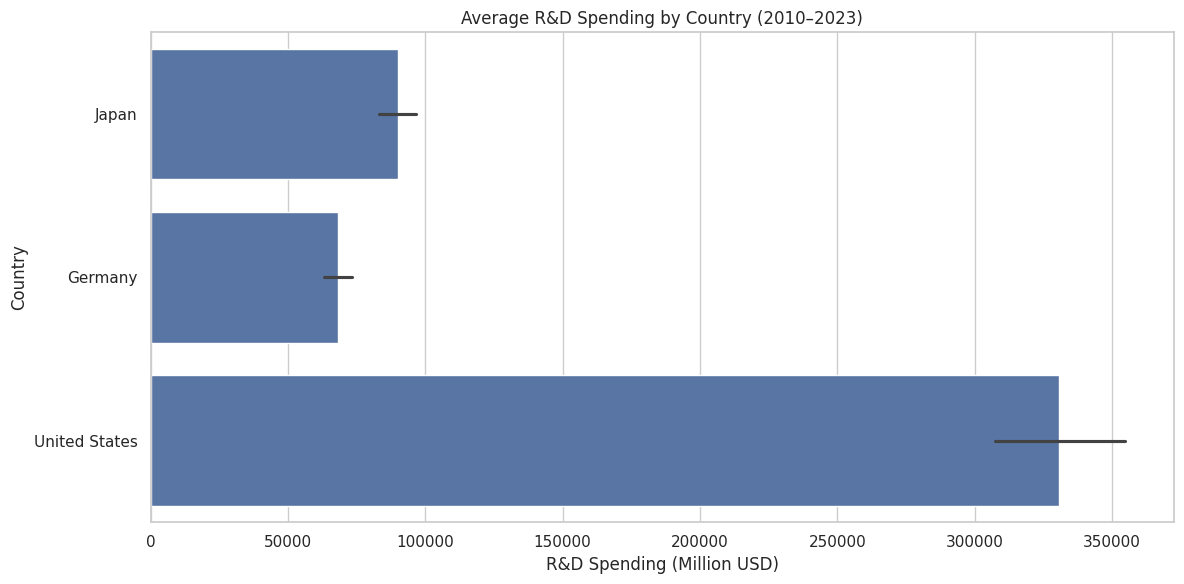

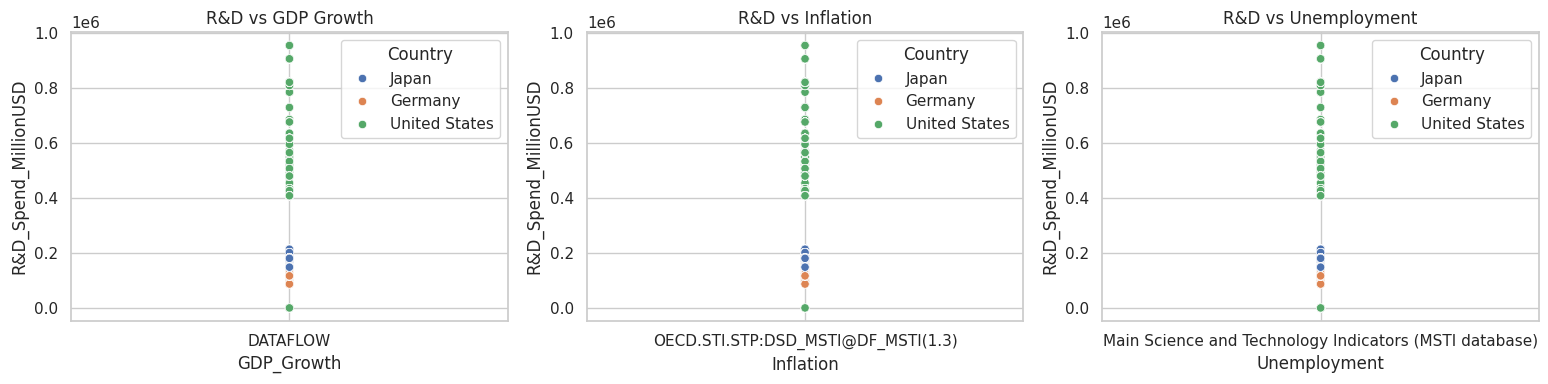

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Load cleaned datasets
oecd = pd.read_csv('/content/oecd_cleaned.csv')
macro = pd.read_csv('/content/macro_cleaned.csv')
company = pd.read_csv('/content/company_cleaned.csv')

# 2) Inspect columns
print("OECD columns:", oecd.columns.tolist())
print("Macro columns:", macro.columns.tolist())
print("Company columns:", company.columns.tolist())

# 3) Merge
if 'Year' in oecd.columns and 'Year' in macro.columns:
    merged = pd.merge(oecd, macro, on=['Country', 'Year'], how='inner')
else:
    merged = pd.merge(oecd, macro, on='Country', how='inner')

print("Merged columns:", merged.columns.tolist())
print("Merged shape:", merged.shape)
display(merged.head())

# 4) Identify which macro columns hold the indicators
#    (anything beyond Country, Year, R&D_Spend_MillionUSD)
base_cols = {'Country', 'Year', 'R&D_Spend_MillionUSD', 'Company_R&D_Spend_MillionUSD'}
macro_inds = [c for c in merged.columns if c not in base_cols]

if len(macro_inds) >= 3:
    # assume first three are GDP, Inflation, Unemployment
    rename_map = {
        macro_inds[0]: 'GDP_Growth',
        macro_inds[1]: 'Inflation',
        macro_inds[2]: 'Unemployment'
    }
    merged = merged.rename(columns=rename_map)
    print("Renamed macro columns:", rename_map)
else:
    raise ValueError(f"Expected at least 3 macro columns, found: {macro_inds}")

# 5) Drop any rows missing key values
merged = merged.dropna(subset=['R&D_Spend_MillionUSD', 'GDP_Growth', 'Inflation', 'Unemployment'])
print("After dropping NA, shape:", merged.shape)

# 6) Plot 1: Average R&D Spending by Country
plt.figure(figsize=(12, 6))
sns.barplot(data=merged, x='R&D_Spend_MillionUSD', y='Country', estimator='mean')
plt.title("Average R&D Spending by Country (2010–2023)")
plt.xlabel("R&D Spending (Million USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



# 8) Plot 3: Scatter Plots
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=merged, x='GDP_Growth', y='R&D_Spend_MillionUSD', hue='Country')
plt.title("R&D vs GDP Growth")

plt.subplot(1, 3, 2)
sns.scatterplot(data=merged, x='Inflation', y='R&D_Spend_MillionUSD', hue='Country')
plt.title("R&D vs Inflation")

plt.subplot(1, 3, 3)
sns.scatterplot(data=merged, x='Unemployment', y='R&D_Spend_MillionUSD', hue='Country')
plt.title("R&D vs Unemployment")

plt.tight_layout()
plt.show()


Company columns: ['CountryCode', 'MEASURE', 'Year', 'Company_R&D_Spend_MillionUSD']
Macro (wide) sample:
Indicator  Country  Year  GDP_Growth  Inflation  Unemployment
0          Germany  2010    4.146768   1.103810         7.043
1          Germany  2011    3.757969   2.075173         5.967
2          Germany  2012    0.474291   2.008489         5.372
3          Germany  2013    0.386225   1.504723         5.316
4          Germany  2014    2.169499   0.906794         4.980 

OECD R&D sample:
   Country  Year  R&D_Spend_MillionUSD
0    Japan  2012           166269.9037
1    Japan  2011           165651.3114
2    Japan  2010           160423.7460
3  Germany  2023           178970.4007
4  Germany  2014           109562.6834 

Merged sample:
   Country  Year  R&D_Spend_MillionUSD  GDP_Growth  Inflation  Unemployment
0    Japan  2012           166269.9037    1.374751  -0.044065         4.358
1    Japan  2011           165651.3114    0.023810  -0.272456         4.550
2    Japan  2010         

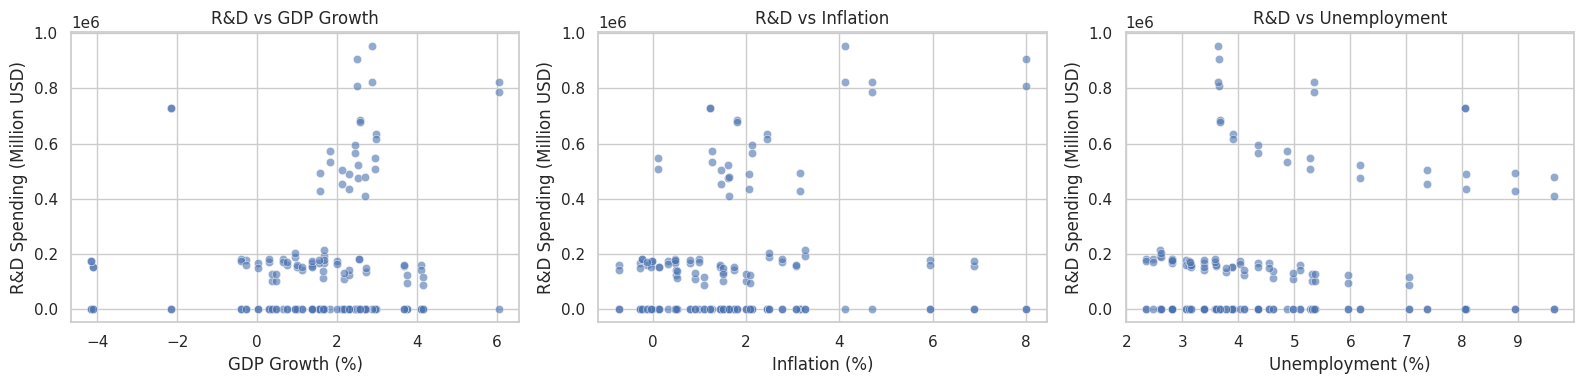

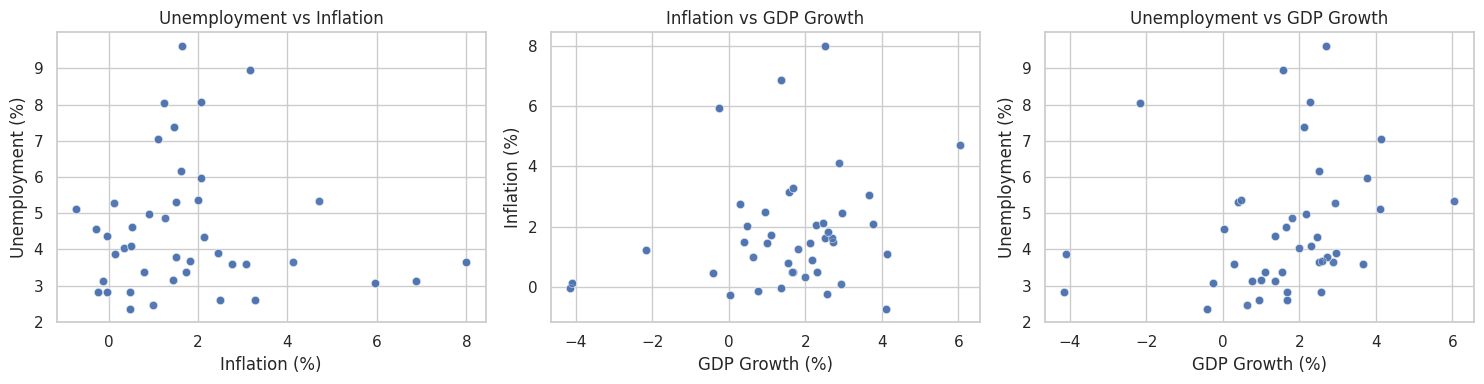

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set(style="whitegrid")
oecd = pd.read_csv('/content/oecd_cleaned.csv')
macro = pd.read_csv('/content/macro_cleaned.csv')
company = pd.read_csv('/content/company_cleaned.csv')
# 1) (Optional) Load company data

print("Company columns:", company.columns.tolist())

# 2) Load & reshape raw macro data
macro_raw = macro_raw.rename(columns={'Country Name': 'Country', 'Series Name': 'Indicator'})
year_cols = [c for c in macro_raw.columns if re.match(r'^\d{4} \[YR\d{4}\]$', c)]

macro_long = macro_raw.melt(
    id_vars=['Country', 'Indicator'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)
macro_long['Year'] = macro_long['Year'].str.extract(r'(\d{4})').astype(int)
macro_long['Value'] = pd.to_numeric(macro_long['Value'], errors='coerce')

macro_long = (
    macro_long
    .dropna(subset=['Value'])
    .groupby(['Country','Year','Indicator'], as_index=False)['Value']
    .mean()
)

macro_wide = (
    macro_long
    .pivot(index=['Country','Year'], columns='Indicator', values='Value')
    .reset_index()
)
macro_wide = macro_wide.rename(columns={
    'GDP growth (annual %)': 'GDP_Growth',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Unemployment, total (% of total labor force) (national estimate)': 'Unemployment'
})
macro_wide = macro_wide[['Country','Year','GDP_Growth','Inflation','Unemployment']]
print("Macro (wide) sample:")
print(macro_wide.head(), "\n")

# 3) Load & clean OECD R&D data

oecd = oecd.rename(columns={'TIME_PERIOD': 'Year', 'Value': 'R&D_Spend_MillionUSD'})
oecd['Year'] = pd.to_numeric(oecd['Year'], errors='coerce').astype(int)
oecd['R&D_Spend_MillionUSD'] = pd.to_numeric(oecd['R&D_Spend_MillionUSD'], errors='coerce')
oecd = oecd[['Country','Year','R&D_Spend_MillionUSD']].dropna()
print("OECD R&D sample:")
print(oecd.head(), "\n")

# 4) Merge datasets
merged = pd.merge(oecd, macro_wide, on=['Country','Year'], how='inner')
print("Merged sample:")
print(merged.head(), "\n")

# 5) Plot R&D vs macro indicators
plt.figure(figsize=(16, 4))
for i, col in enumerate(['GDP_Growth','Inflation','Unemployment'], start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=merged, x=col, y='R&D_Spend_MillionUSD', alpha=0.6)
    plt.title(f"R&D vs {col.replace('_',' ')}")
    plt.xlabel(col.replace('_',' ') + " (%)")
    plt.ylabel("R&D Spending (Million USD)")
plt.tight_layout()
plt.show()

# 6) Plot pairwise macro vs macro
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(data=merged, x='Inflation',   y='Unemployment', alpha=0.6)
plt.title("Unemployment vs Inflation")
plt.xlabel("Inflation (%)")
plt.ylabel("Unemployment (%)")

plt.subplot(1, 3, 2)
sns.scatterplot(data=merged, x='GDP_Growth',  y='Inflation',    alpha=0.6)
plt.title("Inflation vs GDP Growth")
plt.xlabel("GDP Growth (%)")
plt.ylabel("Inflation (%)")

plt.subplot(1, 3, 3)
sns.scatterplot(data=merged, x='GDP_Growth',  y='Unemployment', alpha=0.6)
plt.title("Unemployment vs GDP Growth")
plt.xlabel("GDP Growth (%)")
plt.ylabel("Unemployment (%)")

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

sns.set(style="whitegrid")

# 1) Load & reshape raw macro data
macro_raw = pd.read_csv('/content/macro_cleaned.csv')
macro_raw = macro_raw.rename(columns={
    'Country Name': 'Country',
    'Series Name': 'Indicator'
})

# Identify year columns like '2010 [YR2010]'
year_cols = [c for c in macro_raw.columns if re.match(r'^\d{4} \[YR\d{4}\]$', c)]

# Melt to long format
macro_long = macro_raw.melt(
    id_vars=['Country', 'Indicator'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)
# Clean Year and Value
macro_long['Year'] = macro_long['Year'].str.extract(r'(\d{4})').astype(int)
macro_long['Value'] = pd.to_numeric(macro_long['Value'], errors='coerce')

# Drop NaNs and aggregate duplicates
macro_long = (macro_long
    .dropna(subset=['Value'])
    .groupby(['Country','Year','Indicator'], as_index=False)['Value']
    .mean()
)

# Pivot to wide format
macro_wide = (macro_long
    .pivot(index=['Country','Year'], columns='Indicator', values='Value')
    .reset_index()
)
# Rename the key columns
macro_wide = macro_wide.rename(columns={
    'GDP growth (annual %)': 'GDP_Growth',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Unemployment, total (% of total labor force) (national estimate)': 'Unemployment'
})
macro_wide = macro_wide[['Country','Year','GDP_Growth','Inflation','Unemployment']]

# 2) Load & clean OECD R&D data
oecd = pd.read_csv('/mnt/data/oecd_cleaned.csv')
oecd = oecd.rename(columns={'TIME_PERIOD': 'Year', 'Value': 'R&D_Spend_MillionUSD'})
oecd['Year'] = pd.to_numeric(oecd['Year'], errors='coerce').astype(int)
oecd['R&D_Spend_MillionUSD'] = pd.to_numeric(oecd['R&D_Spend_MillionUSD'], errors='coerce')
oecd = oecd[['Country','Year','R&D_Spend_MillionUSD']].dropna()

# 3) Merge datasets
merged = pd.merge(oecd, macro_wide, on=['Country','Year'], how='inner')

# 4) Plot R&D vs macro indicators
plt.figure(figsize=(16, 4))
for i, col in enumerate(['GDP_Growth','Inflation','Unemployment'], start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=merged, x=col, y='R&D_Spend_MillionUSD', alpha=0.6)
    plt.title(f"R&D vs {col.replace('_',' ')}")
    plt.xlabel(col.replace('_',' ') + " (%)")
    plt.ylabel("R&D Spending (Million USD)")
plt.tight_layout()
plt.show()

# 5) Plot pairwise macro vs macro
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(data=merged, x='Inflation', y='Unemployment', alpha=0.6)
plt.title("Unemployment vs Inflation")
plt.xlabel("Inflation (%)")
plt.ylabel("Unemployment (%)")

plt.subplot(1, 3, 2)
sns.scatterplot(data=merged, x='GDP_Growth', y='Inflation', alpha=0.6)
plt.title("Inflation vs GDP Growth")
plt.xlabel("GDP Growth (%)")
plt.ylabel("Inflation (%)")

plt.subplot(1, 3, 3)
sns.scatterplot(data=merged, x='GDP_Growth', y='Unemployment', alpha=0.6)
plt.title("Unemployment vs GDP Growth")
plt.xlabel("GDP Growth (%)")
plt.ylabel("Unemployment (%)")

plt.tight_layout()
plt.show()

# 6) Correlation matrix & heatmap
corr_mat = merged[['R&D_Spend_MillionUSD', 'GDP_Growth','Inflation','Unemployment']].corr()
print("Correlation matrix:\n", corr_mat, "\n")
plt.figure(figsize=(6,5))
sns.heatmap(corr_mat, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 7) Pearson correlations
pearson_results = []
for col in ['GDP_Growth','Inflation','Unemployment']:
    r, p = stats.pearsonr(merged[col], merged['R&D_Spend_MillionUSD'])
    pearson_results.append({'Indicator': col, 'Pearson_r': r, 'p_value': p})
pearson_df = pd.DataFrame(pearson_results)
print("Pearson correlation results:\n", pearson_df, "\n")

# 8) Simple linear regressions
for col in ['GDP_Growth','Inflation','Unemployment']:
    X = sm.add_constant(merged[col])
    y = merged['R&D_Spend_MillionUSD']
    model = sm.OLS(y, X).fit()
    print(f"Regression of R&D on {col}:\n", model.summary(), "\n")

# 9) Multiple linear regression
X_multi = sm.add_constant(merged[['GDP_Growth','Inflation','Unemployment']])
y = merged['R&D_Spend_MillionUSD']
multi_model = sm.OLS(y, X_multi).fit()
print("Multiple regression summary:\n", multi_model.summary(), "\n")

# 10) Scatter with regression line plots
plt.figure(figsize=(16, 4))
for i, col in enumerate(['GDP_Growth','Inflation','Unemployment'], start=1):
    plt.subplot(1, 3, i)
    sns.regplot(data=merged, x=col, y='R&D_Spend_MillionUSD', scatter_kws={'alpha':0.6})
    plt.title(f"R&D vs {col.replace('_',' ')} (with fit line)")
    plt.xlabel(col.replace('_',' '))
    plt.ylabel("R&D Spending")
plt.tight_layout()
plt.show()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Indicator']"